In [1]:
import string 
import re

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip


     - 11.7 MB 123 kB/s
  Created wheel for pythainlp: filename=pythainlp-3.0.5-py3-none-any.whl size=11506636 sha256=5d501acbafa2794de7bfadef19197fd9517b283f1bcc75fb6fe2b771e92f5236
  Stored in directory: /tmp/pip-ephem-wheel-cache-idts_lyo/wheels/87/69/e8/234fe11c5f2ec389a780229b2a1619e17b8ad38cd45eaf20f7
Successfully built pythainlp


In [2]:
from pythainlp.tokenize import word_tokenize

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('https://raw.githubusercontent.com/PatiphatMitsanthia/Artificial-Intelligence-for-Data-Analytics/main/BullyDataset.csv', sep='\t', names=['Tweet', 'Text'], header=None)
df

Mounted at /content/drive


,Tweet,Text
0,ถ้าไม่กินข้าวจะผอมเป็นไม่เหมือนพี่นะ,Bullying
1,ดูคนนั้นสิ ไม่ชอบกินผักเลยอ้วนหน้าเกลียดเหมือน...,Bullying
2,กูที่เห็นคอมเมนท์?โง่ๆแบบนี้,Bullying
3,สิ่งที่เป็นภาระคือพวกมึง,Bullying
4,ถ้าสมองมีแค่นี้ก็ก็ออกไปทำอย่างอื่นเถอะ,Bullying
...,...,...
1105,สวยแบบสตรีเหล็กค่ะแม่,Non-Bullying
1106,แข็งแรงมากแม่ 555,Non-Bullying
1107,คิมิโน๊ะโต๊ะ,Non-Bullying
1108,แบ้วมากค่ะยาย5555,Non-Bullying


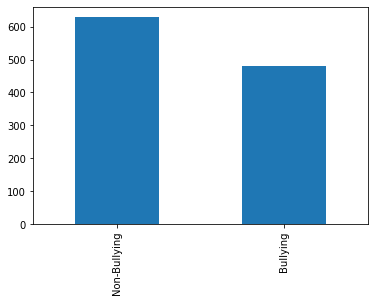

In [4]:
df['Text'].value_counts().plot.bar()

In [5]:
#ตัดคำ ลบคำ
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ประการฉะนี้',
 'เท่านี้',
 'ทํา',
 'สั้นๆ',
 'สําหรับ',
 'นิดๆ',
 'คราวละ',
 'ครั้ง',
 'ดังกับ',
 'ภายหน้า',
 'ประกอบ',
 'คิด',
 'เรื่อยๆ',
 'ช่วงต่อไป',
 'ควร',
 'ขณะใดๆ',
 'นอกเหนือ',
 'ไม่ใช่',
 'ด้วยประการฉะนี้',
 'เก็บ',
 'เรื่อย',
 'จริงๆจังๆ',
 'แห่งนี้',
 'ถึงบัดนี้',
 'ปิด',
 'พร้อมทั้ง',
 'ดั่งกับว่า',
 'จากนั้น',
 'มากกว่า',
 'บัดดล',
 'บ้าง',
 'มั๊ย',
 'ทั้งนั้น',
 'อย่างไหน',
 'ให้มา',
 'เหล่า',
 'นี้',
 'ช้า',
 'พร้อมที่',
 'ระยะ',
 'หากแม้น',
 'ปรากฏว่า',
 'กระนั้น',
 'ประการหนึ่ง',
 'เช่นนั้นเอง',
 'ภาคฯ',
 'นี่นา',
 'ผ่าน',
 'แล้ว',
 'ที่แท้',
 'อดีต',
 'หนอ',
 'เสร็จ',
 'เคยๆ',
 'บาง',
 'กันไหม',
 'อาจจะ',
 'ยิ่งใหญ่',
 'ทั้ง',
 'ถึงแม้ว่า',
 'อนึ่ง',
 'แต่ละ',
 'เช่นใด',
 'ภาค',
 'รือ',
 'ความ',
 'อยู่',
 'เช่นที่ว่า',
 'ค่อยๆ',
 'ยังคง',
 'เห็นควร',
 'ไง',
 'แค่นี้',
 'ยังแต่',
 'หลังจาก',
 'ราย',
 'ดั่งเก่า',
 'ที่แล้ว',
 'ทันที',
 'เชื่อว่า',
 'ซึ่งได้แก่',
 'รึว่า',
 'กว้างๆ',
 'สุดๆ',
 'มั้ยล่ะ',
 'เพียงแต่',
 'ใหม่',
 'พูด',
 'เสียนี่กระไร',
 'ช่วงถัดไป',
 'ใ

In [6]:
!pip install sklearn-pycrfsuite
from pythainlp import word_tokenize
def text_process(Tweet):
    final = "".join(u for u in Tweet if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['Tweet_tokens'] = df['Tweet'].apply(text_process)
df 

     |████████████████████████████████| 485 kB 10.6 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11002 sha256=c02b58bd2afc31396913ae38ac280e68ec66185444daf4977028c0b8fa669474
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=777532 sha256=8ea3e696b772fbcadd3dd2b0249f1387ca9d06e951815548b71ed5304a28d805
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension


,Tweet,Text,Tweet_tokens
0,ถ้าไม่กินข้าวจะผอมเป็นไม่เหมือนพี่นะ,Bullying,ถ้า ไม่ กินข้าว จะ ผอม เป็น ไม่ เหมือน พี่ นะ
1,ดูคนนั้นสิ ไม่ชอบกินผักเลยอ้วนหน้าเกลียดเหมือน...,Bullying,ดู คน นั้น สิ ไม่ ชอบ กิน ผัก เลย อ้วน หน้า เก...
2,กูที่เห็นคอมเมนท์?โง่ๆแบบนี้,Bullying,กู ที่ เห็น คอมเมนท์ โง่ แบบนี้
3,สิ่งที่เป็นภาระคือพวกมึง,Bullying,สิ่ง ที่ เป็น ภาระ คือ พวก มึง
4,ถ้าสมองมีแค่นี้ก็ก็ออกไปทำอย่างอื่นเถอะ,Bullying,ถ้า สมอง มี แค่นี้ ก็ ก็ ออก ไป ทำ อย่าง อื่น ...
...,...,...,...
1105,สวยแบบสตรีเหล็กค่ะแม่,Non-Bullying,สวย แบบ สตรี เหล็ก ค่ะ แม่
1106,แข็งแรงมากแม่ 555,Non-Bullying,แข็งแรง มาก แม่ 555
1107,คิมิโน๊ะโต๊ะ,Non-Bullying,คิ มิ โน๊ะ โต๊ะ
1108,แบ้วมากค่ะยาย5555,Non-Bullying,แบ้ ว มาก ค่ะ ยาย 5555


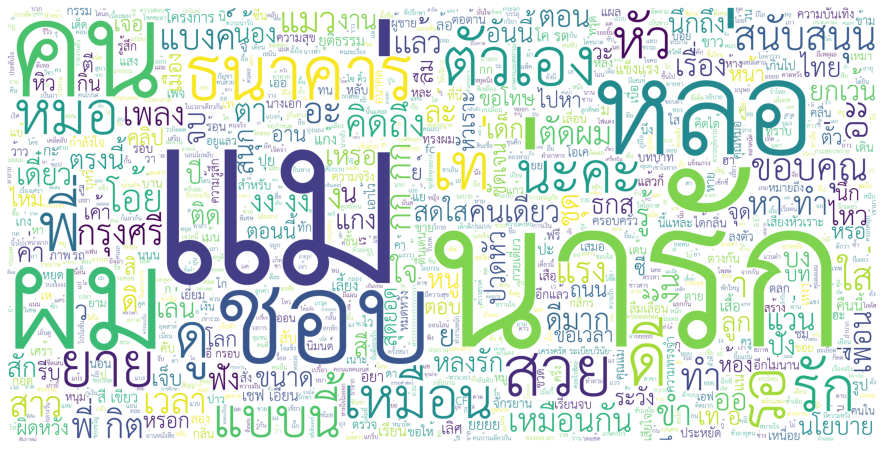

In [7]:
from numpy.lib.twodim_base import flipud
#ข้อความไม่บูลลี่
from wordcloud import WordCloud, STOPWORDS


df_non = df[df['Text'] == 'Non-Bullying']
non_word_all = " ".join(Tweet for Tweet in df_non['Tweet_tokens'])
reg = r"[ก-๙a-zA-Z']+"
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
path = '/content/drive/My Drive/THSarabunNew.ttf'

wordcloud = WordCloud(
              stopwords=thai_stopwords, background_color = 'white', 
              max_words=2000, 
              height = 2000, width=4000,
              font_path=path, regexp=reg).generate(non_word_all)
    

plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

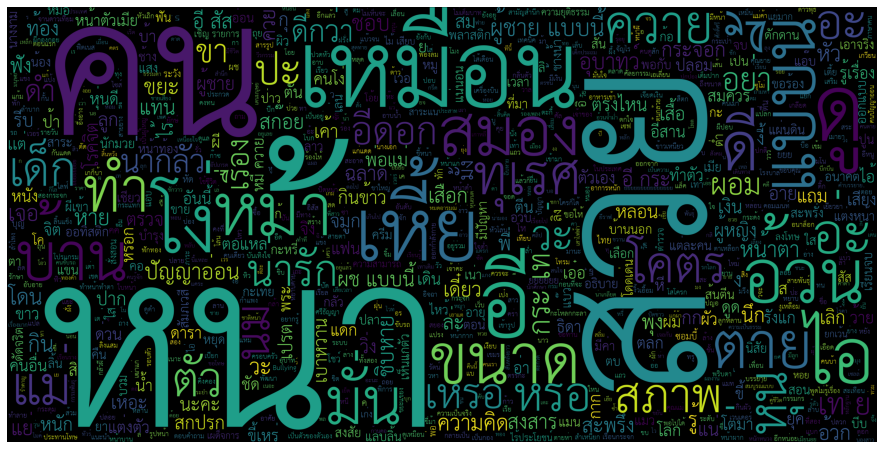

In [8]:
df_bully = df[df['Text'] == 'Bullying']
bully_word_all = " ".join(Tweet for Tweet in df_bully['Tweet_tokens'])
reg = r"[ก-๙a-zA-Z']+"
#fp = 'THSarabunNew.ttf' #ไม่มีไฟล์ฟอนต์
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]
path = '/content/drive/My Drive/THSarabunNew.ttf'

wordcloud = WordCloud(
              stopwords=thai_stopwords, background_color = 'black', 
              max_words=2000, 
              height = 2000, width=4000,
              font_path=path, regexp=reg).generate(bully_word_all)
    

plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [9]:
#Split ข้อมูลเป็น Train (70%) Test (30%)
from sklearn.model_selection import train_test_split

X = df[['Tweet_tokens']]
y = df['Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
#Word Vectorizer และ Bag-of-Words (BoW)
#การจะสร้างแบบจำลองวิเคราะห์ความรู้สึกจากข้อความ จำเป็นจะต้องแปลงข้อมูลให้อยู่ในรูปแบบที่มีจำนวนของตัวแปรที่ทำกัน 
#โดยเริ่มต้นเราจะใช้ Count Vectorizer ของ sklearn มาช่วยในการจัดการดึงคำทั้งหมดออกมาจากข้อความ และจัดเก็บในรูปแบบ Vector 

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['Tweet_tokens'])
cvec.vocabulary_

{'ก็': 93,
 'งี้': 247,
 'แหละ': 1426,
 'สก๊อย': 872,
 'อัปเกรด': 1060,
 'ทำตัว': 456,
 'ไร้ค่า': 1511,
 'คราวหน้า': 179,
 'ไม่': 1503,
 'อยาก': 1032,
 'ต่อย': 410,
 'จอ': 261,
 'แล้ว': 1418,
 'อ่ะ': 1092,
 'มัน': 691,
 'มันส์': 692,
 'ข้าม': 142,
 'ปี': 607,
 'หลอก': 987,
 'หัว': 1007,
 'ร้อน': 806,
 'ดิ': 336,
 'ผม': 619,
 'ทรง': 439,
 'นี้': 528,
 'พี่': 664,
 'กิต': 82,
 'เท่': 1196,
 'มาก': 701,
 'อย่า': 1039,
 'ถามหา': 424,
 'ความยุติธรรม': 197,
 'ใน': 1479,
 'เมือง': 1240,
 'เผด็จการ': 1225,
 'อี': 1071,
 'นี่': 526,
 'ควร': 188,
 'พบ': 640,
 'หมอ': 969,
 'นะ': 507,
 'เอาจริง': 1332,
 'แม่': 1406,
 'ให้': 1488,
 'บง': 551,
 'คะ': 207,
 'ลูก': 837,
 'ของ': 113,
 'ค่ะ': 234,
 'ยาย': 747,
 'ต้อง': 416,
 'เต้น': 1185,
 'เด้าลม': 1176,
 'ประกอบ': 586,
 'เพลง': 1230,
 'ด้วย': 350,
 'หน้าบาน': 963,
 'เป็น': 1216,
 'กระด้ง': 44,
 'หล่อ': 996,
 'เกิน': 1118,
 '55': 15,
 'แมน': 1403,
 'อะนะ': 1053,
 'งุ้ย': 249,
 'น่ารัก': 542,
 'ก': 33,
 'สภาพ': 883,
 'สู': 940,
 'อับอาย': 1059,
 'ขาย': 

In [11]:
#การฝึกฝนแบบจำลอง ใช้แสดงข้อมูลให้เห็นภาพ

train_bow = cvec.transform(X_train['Tweet_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['Tweet_tokens'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,#,),+,1,100,17,2,2022,25,27,3,32,4,5,53535362,55,555,5555,55555,555555,5555555,55555555,555555555,5555555555555,7,71,8,"84,000",Bullying,CF,OF,cf,onlyfans,ก,กก,กด,กรม,กรรม,กรอบ,กระ,...,ไกล,ไก่,ไง,ได้,ได้กลิ่น,ได้ยิน,ได้รับ,ได๋น้อ,ไทย,ไป,ไปหา,ไฟแดง,ไมค์,ไม่,ไม่ค่อย,ไม่เต็มบาท,ไม่เป็นไร,ไม่เห็นจะ,ไม้,ไร,ไร้,ไร้ค่า,ไร้ประโยชน์,ไว,ไวท์,ไว้,ไส่,ไส้เดือน,ไหน,ไหม,ไหม้,ไหว,ไห้,ไอ,ไอดอล,ไอ่,ไอ่ต้าววว,ไอ้,์,…
Tweet_tokens,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ก็ งี้ แหละ สก๊อย อัปเกรด,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ทำตัว ไร้ค่า,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
คราวหน้า ไม่ อยาก ต่อย จอ แล้ว อ่ะ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
มัน ไม่ มันส์ ข้าม ปี หลอก หัว ร้อน ข้าม ปี อ่ะ ดิ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ผม ทรง นี้ พี่ กิต เท่ มาก,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
พรุน ไป ทั้งตัว ละ พึ่ง มา ขอ โทด,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ได้ นะ แม่ 55555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
มีเงิน เข้า ฟิตเนส ก็ เจียดเงิน ไว้ ทำ หน้า บ้าง,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#สร้างแบบจำลอง Logistic Regression เพื่อจำแนกความ ไม่บูลลี่ หรือ บูลลี่

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['Tweet_tokens'])
test_predictions = lr.predict(test_bow)

In [13]:
#สร้างแบบจำลอง Decition tree

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
X = df[['Tweet_tokens']]
y = df['Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

mtree = tree.DecisionTreeClassifier(max_depth=4)
mtree.fit(train_bow, y_train)

from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['Tweet_tokens'])
test_predictions2 = mtree.predict(test_bow)

In [14]:
#สร้างแบบจำลอง artificial neural network

from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
X = df[['Tweet_tokens']]
y = df['Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(train_bow, y_train)

test_bow = cvec.transform(X_test['Tweet_tokens'])
test_predictions3 = model.predict(test_bow)

In [15]:
#สร้างแบบจำลอง SVM

from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(train_bow, y_train)

from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['Tweet_tokens'])
test_predictions4 = svm.predict(test_bow)

print ('SVM Model')
print(classification_report(test_predictions4, y_test))

SVM Model
              precision    recall  f1-score   support

    Bullying       0.78      0.84      0.81       129
Non-Bullying       0.89      0.85      0.87       204

    accuracy                           0.84       333
   macro avg       0.83      0.84      0.84       333
weighted avg       0.85      0.84      0.84       333



In [16]:
print ('Logistic Regression Model')
print(classification_report(test_predictions, y_test))

Logistic Regression Model
              precision    recall  f1-score   support

    Bullying       0.76      0.88      0.81       119
Non-Bullying       0.93      0.84      0.88       214

    accuracy                           0.86       333
   macro avg       0.84      0.86      0.85       333
weighted avg       0.87      0.86      0.86       333



In [17]:
print ('Decition tree Model')
print(classification_report(test_predictions2, y_test))

Decition tree Model
              precision    recall  f1-score   support

    Bullying       0.19      0.90      0.32        30
Non-Bullying       0.98      0.63      0.77       303

    accuracy                           0.65       333
   macro avg       0.59      0.77      0.54       333
weighted avg       0.91      0.65      0.73       333



In [18]:
print ('Artificial neural network model')
print(classification_report(test_predictions3, y_test))

Artificial neural network model
              precision    recall  f1-score   support

    Bullying       0.81      0.86      0.83       132
Non-Bullying       0.90      0.87      0.89       201

    accuracy                           0.86       333
   macro avg       0.86      0.86      0.86       333
weighted avg       0.87      0.86      0.87       333



In [25]:
#ทดสอบกับข้อความที่เราสร้างขึ้นเอง

my_text = 'ลดได้แล้วมั้ง อ้วนขนาดนี้'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['Bullying'], dtype=object)